In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import re
import string

#Importation des fichiers depuis le drive(je travaille avec google collab)

In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

train = pd.read_csv('/content/drive/MyDrive/NLP/Corona_NLP_train.csv',encoding='latin-1')
test= pd.read_csv('/content/drive/MyDrive/NLP/Corona_NLP_test.csv',encoding='latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train2=train.copy()
train2.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


#Traitement avec spacy

In [7]:

# Charger un modèle de langue anglais
# (tu peux aussi utiliser 'fr_core_news_sm' si c'est en français)
nlp = spacy.load("en_core_web_sm")



# Exemple : garder uniquement la colonne texte
texts = train['OriginalTweet'].astype(str).tolist()

# Fonction de nettoyage avec spaCy
def preprocess_spacy(doc):
    doc = nlp(doc.lower())  # mettre en minuscule + analyse spaCy
    tokens = []
    for token in doc:
        if not token.is_stop and token.is_alpha:  # supprimer stopwords et ponctuation
            tokens.append(token.lemma_)          # utiliser la forme lemmatisée
    return " ".join(tokens)

# Appliquer le traitement
train['clean_text'] = train['OriginalTweet'].astype(str).apply(preprocess_spacy)

# Afficher un exemple
print(train[['OriginalTweet', 'clean_text']].head())


                                       OriginalTweet  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   
1  advice Talk to your neighbours family to excha...   
2  Coronavirus Australia: Woolworths to give elde...   
3  My food stock is not the only one which is emp...   
4  Me, ready to go at supermarket during the #COV...   

                                          clean_text  
0                                                     
1  advice talk neighbour family exchange phone nu...  
2  coronavirus australia woolworth elderly disabl...  
3  food stock panic food need stay calm stay safe...  
4  ready supermarket outbreak paranoid food stock...  




#Visualisations


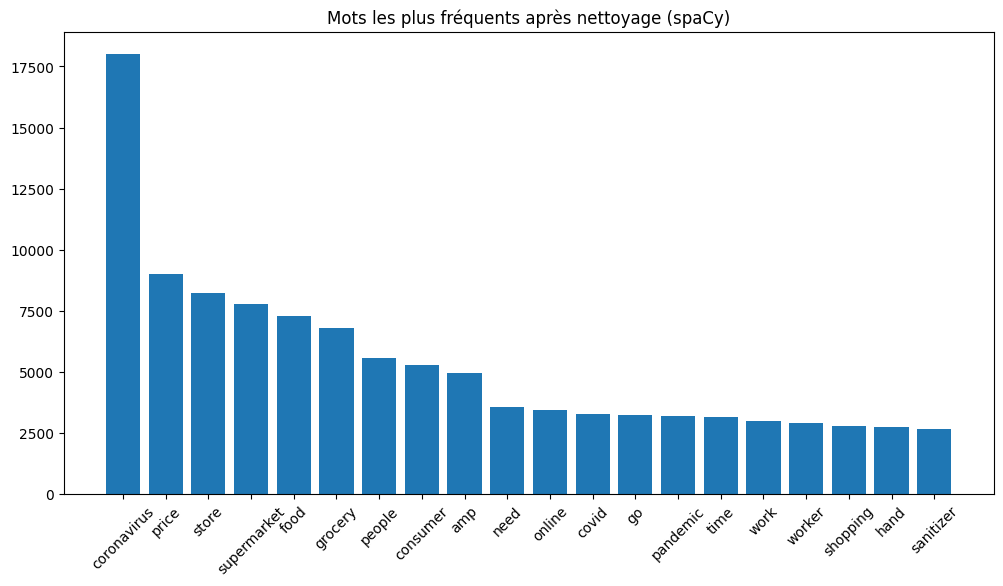

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

# Tokeniser à nouveau tous les textes déjà nettoyés
all_tokens = " ".join(train['clean_text']).split()

# Compter les fréquences des mots
word_freq = Counter(all_tokens)

# Prendre les 20 mots les plus fréquents
common_words = word_freq.most_common(20)

# Séparer mots et fréquences
words, counts = zip(*common_words)

# Visualisation
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Mots les plus fréquents après nettoyage (spaCy)")
plt.show()
